# USCIS Data  

Data Pipeline Implementation to extract, ingest, transform, store and consume USCIS case data.

Objective: Collect case data from USCIS website for analysis purposes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *

## Data Source (USCIS Website)

Data that we need is on USCIS website. You can access case status using a receipt number. 



### Generate n-case Number from given receipt number

In [2]:
# Add reciept number of your interest here
reciept_number = "Enter_reciept_number_here"
# Number of cases to generate
count_cases = 500

# Generate case numbers (-n/2 to +n/2)
case_number_list = generate_receipt_numbers(start_receipt_num=reciept_number, cnt = count_cases)

# Save numbers to text file. This will be used by spider to crawl data
np.savetxt("Scrapy/active_cases/active_cases.csv", case_number_list,delimiter =",", fmt ='% s')
print(len(case_number_list), "Cases generated")

500 Cases generated


## Data Ingestion (Crawl Data Using Scrapy and Ingest raw data in files)

Run program to crawl data from USCIS website using receipt numbers. Crawl data using Scrapy Framework. Store HTML response in csv file

- *scrapy crawl spider_name -o output_file_name*

Eg. **scrapy crawl USCIS -o case_details.csv** 

**NOTE**: Run this command in terminal from *Scrapy* folder

USCIS spider is in USICS_spider.py
This program crawls data from USCIS website to get case status using receipt number. Raw data is stored in output_file (case_details.csv).

This file is used in next steps. Crawl data before moving forward.



## Data Processing (Cleaning and Transformation)

Transform and clean raw data. Enrich data with more attributes. 

**tranform_data()**: This function uses "case description" and generate attributes like Form-Type and Status Date

In [9]:
# Transformation and Cleaning
df_raw = transform_data(pd.read_csv("Scrapy/Daily_Data/case_details.csv"))
df_main = df_raw[["Reciept_Number","Form-Type","Case_Status","Date"]].drop_duplicates()
df_main.dropna(subset=['Case_Status'], inplace = True)

case_distribution(df = df_main,form_type = "I-485")

327  cases from  2022-08-09  to  2023-02-08

Case Status Distribution:
 Case Was Updated To Show Fingerprints Were Taken         33
Response To USCIS' Request For Evidence Was Received      7
Case Was Rejected Because It Was Improperly Filed         6
Case Was Approved                                         5
Case Was Received                                         3
Fees Were Waived                                          2
Request for Initial Evidence Was Sent                     1
Correspondence Was Received And USCIS Is Reviewing It     1
Case Rejected Because I Sent An Incorrect Fee             1
Name: Case_Status, dtype: int64


In [20]:
df_main[["Form-Type","Case_Status","Date"]]

,Form-Type,Case_Status,Date
0,I-765,Case Was Updated To Show Fingerprints Were Taken,09-5-2022
1,I-765,Case Was Updated To Show Fingerprints Were Taken,09-5-2022
2,I-765,Case Was Denied,10-14-2022
3,I-765,Case Was Updated To Show Fingerprints Were Taken,09-5-2022
4,I-765,Case Was Updated To Show Fingerprints Were Taken,09-5-2022
...,...,...,...
489,I-601,Case Was Received,08-30-2022
492,,Card Was Picked Up By The United States Postal...,11-7-2022
494,,Card Was Picked Up By The United States Postal...,11-7-2022
496,I-130,Case Was Approved,12-6-2022


## Data Storage (Data Warehouse / CSV Files)

In [5]:
# Save current_df as Most_Recent_Data 
df_main.to_csv("Scrapy/Daily_Data/clean_case_data.csv")

## Data Consumption (Data Analytics. Maybe Power BI or Tableau)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Approved'),
  Text(1, 0, 'Rejected or Denied'),
  Text(2, 0, 'RFE Sent'),
  Text(3, 0, 'RFE Received'),
  Text(4, 0, 'Other')])

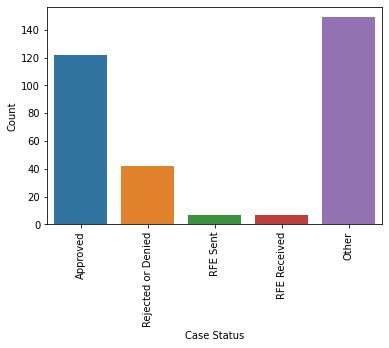

In [21]:
summary_plot = sns.barplot(data=summary(df_main), x="Case Status", y="Count")
plt.xticks(rotation=90)